In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
from scipy.stats import gaussian_kde
from scipy.io import loadmat
import sys
from scipy.stats import norm
from tqdm import tqdm
import json

%load_ext autoreload
%autoreload 2

%matplotlib inline

# Figure 1

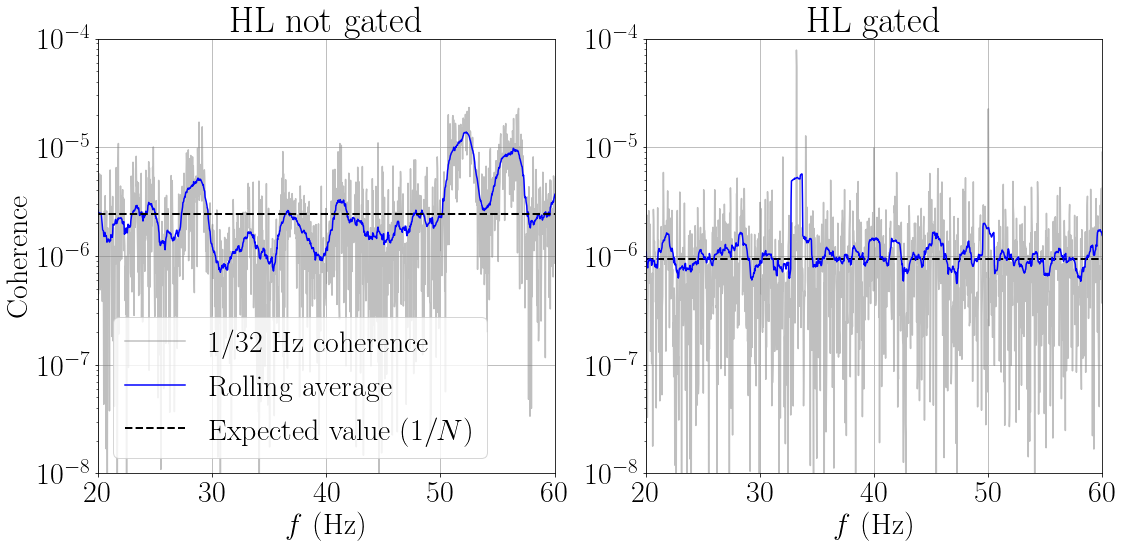

In [2]:
# Plotting options
mpl.rcParams.update({'font.size':30,'font.family':'serif','text.usetex':True})

# Create figure
fig,axes=plt.subplots(1,2,figsize=(18,8),facecolor='white')

# Read in data
f,coh_nogate,coh_gate=np.loadtxt('coherences.dat',unpack=True)
freqs_nogate=f
freqs_gate=f
NSeg_nogate=409984
NSeg_gate=1064670

# Compute rolling average
rolling_nogate=np.zeros(len(freqs_nogate))
rolling_gate=np.zeros(len(freqs_nogate))
iroll=int(1*32)
for ii in range(len(freqs_nogate)):
    istart = max(0,ii-int(iroll/2))
    iend = min(len(freqs_nogate),ii+int(iroll/2))
    rolling_nogate[ii]=np.mean(coh_nogate[istart:iend])
    rolling_gate[ii]=np.mean(coh_gate[istart:iend])


# Panel 1: Coherences without gating
axes[0].semilogy(freqs_nogate,coh_nogate,color='gray',alpha=0.5,label='1/32 Hz coherence')
axes[0].semilogy(freqs_nogate,rolling_nogate,color='blue',label='Rolling average')
axes[0].axhline(1/NSeg_nogate,linestyle='--',color='black',linewidth=2,label=r'Expected value ($1/N$)')
axes[0].set_xlim(20,60)
axes[0].set_ylim(1e-8,1e-4)
axes[0].set_xlabel('$f$ (Hz)')
axes[0].legend(loc=3)
axes[0].set_ylabel('Coherence')
axes[0].set_title('HL not gated')
axes[0].grid()


# Panel 2: Coherences with gating
axes[1].semilogy(freqs_gate,coh_gate,color='gray',alpha=0.5)
axes[1].axhline(1/NSeg_gate,linestyle='--',color='black',linewidth=2)
axes[1].semilogy(freqs_gate,rolling_gate,color='blue')
axes[1].set_xlim(20,60)
axes[1].set_ylim(1e-8,1e-4)
axes[1].set_xlabel('$f$ (Hz)')
axes[1].set_title('HL gated')
axes[1].grid()

plt.show()

# Figure 2


/Users/andrewmatas/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


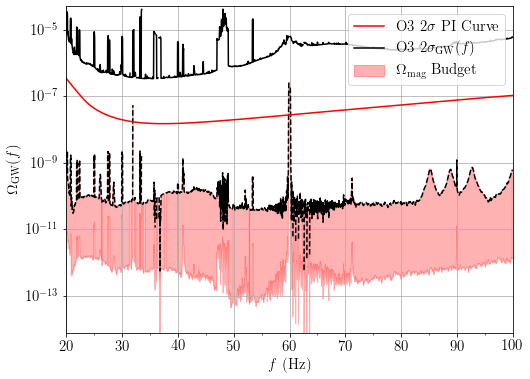

In [3]:
# set 
mpl.rcParams.update({'font.size':15,
                           'text.usetex':True})

plt.figure(figsize=(8,6),facecolor='white')

f,lower,upper=np.loadtxt('MagBudget.dat',unpack=True)
freq_PI, PI = np.loadtxt('PICurve_O3.dat',unpack=True)
freq_PI, PI = np.loadtxt('PICurve_O3.dat',unpack=True)
_,_,sigma_f_HL = np.loadtxt('C_O3_HL.dat',unpack=True)
_,_,sigma_f_HV = np.loadtxt('C_O3_HV.dat',unpack=True)
_,_,sigma_f_LV = np.loadtxt('C_O3_LV.dat',unpack=True)
sigma_f = 1/np.sqrt(sigma_f_HL**(-2)+sigma_f_HV**(-2)+sigma_f_LV**(-2))

plt.fill_between(f,upper,lower,color='red',alpha=0.3,label=r'$\mathrm{\Omega_\mathrm{mag}\ Budget}$')
plt.semilogy(f,upper,color='black',linestyle='--',alpha=1)

plt.semilogy(freq_PI,PI*2,color='red',label=r'$\mathrm{O3\ 2\sigma\ PI\ Curve}$')
plt.semilogy(freq_PI,2*sigma_f,color='black',label=r'$\mathrm{O3}\ 2\sigma_{\rm GW}(f)$')

plt.grid()
plt.xlabel('$f\ \mathrm{(Hz)}$')
plt.ylabel(r'$\Omega_\mathrm{GW}(f)$')
plt.grid()
ax=plt.gca()
ax.xaxis.set_minor_locator(MultipleLocator(5))
plt.xlim(20,100)
plt.ylim(8e-15,5e-5)
plt.legend(loc=1,facecolor='white')
plt.grid()

plt.show()

# Figure 3 


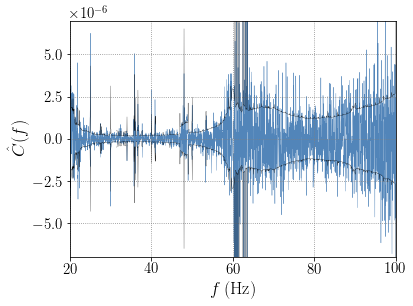

In [4]:
# Load data
freqs,Ys,sigmas = np.loadtxt('C_O1_O2_O3.dat',unpack=True)

# Initialize figure
scale=1.5
fig,ax = plt.subplots(figsize=(4*scale,3*scale),facecolor='white')
ax.set_xlim([20.,100.])
ax.set_ylim([-0.7e-5,0.7e-5])

# Define color
blue='#08519c'

# Plot Data
ax.plot(freqs,Ys,color=blue,zorder=-1,alpha=0.7,lw=0.4)

# Plot error bars
ax.plot(freqs,-sigmas,color='black',lw=0.25)
ax.plot(freqs,sigmas,color='black',lw=0.25)

# Labels, grid, etc
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$f \,(\mathrm{Hz})$',fontsize=12*scale)
ax.set_ylabel(r'$\hat C(f)$',fontsize=12*scale)
locs=np.arange(-5e-6,5.1e-6,2.5e-6)
ax.set_yticks(locs)
ax.tick_params(labelsize=10*scale)
ax.yaxis.offsetText.set_fontsize(10*scale)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax.set_axisbelow(True)
plt.tight_layout()

plt.show()

# Figure 4


In [5]:
def histogramData(ax,data,color,bins,priorXvals=None,priorYvals=None):

    """
    Function creating 1D posterior histogram

    INPUTS
    ax: matplotlib axis object
    data: Posterior samples
    color: color specification
    bins: Bins to be used in histogram
    priorXvals: An array of x-values at which our prior is defined (used to plot prior, if provided)
    priorYvals: Array of corresponding prior values (used to plot prior, if provided)

    OUTPUT
    ax: Axis object containing posterior plot
    """

    # Histogram data, get resulting ylimits
    ax.hist(data,density=True,histtype='stepfilled',color=color,bins=bins,edgecolor='black')
    ylims = ax.get_ylim()

    # Plot priors
    if np.any(priorXvals!=None):
        ax.plot(priorXvals,priorYvals,ls='--',color='grey')
        ax.set_ylim(ylims) # Set ylimits based on posteriors alone

    # Misc set-up
    ax.xaxis.grid(True,which='major',linestyle='dotted',linewidth=2)
    ax.yaxis.grid(True,which='major',linestyle='dotted',linewidth=2)
    #ax.tick_params(labelsize=8)
    ax.set_ylim(bottom=0.)

    # Return
    return ax

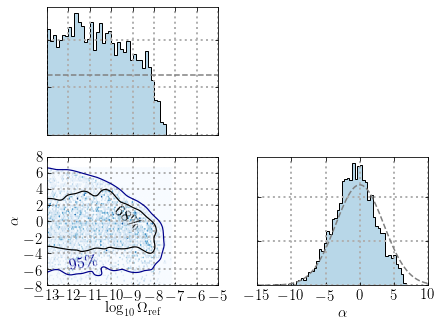

In [6]:
# Font settings
mpl.rcParams.update({'font.size':15})
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

data='PL_GaussianAlpha_log.dat'

# Load TVS posterior samples
OmgT,aT = np.loadtxt(data,unpack=True) 

# colors
lightBlue=(166./255.,206./255.,227./255.,0.8)
darkBlue=(31./255.,120./255.,180./255.)
lightGreen=(178./255.,223./255.,138./255.,0.8)
darkGreen=(51./255.,160./255.,44./255.)
lightRed=(251./255.,154./255.,153./255.,0.8)
darkRed=(227./255.,26./255.,28./255.)

# Bins
logOmgMin=-13.
logOmgMax=-5.
dlogOmg=8.
amax=15
OmegaBins = np.arange(logOmgMin,logOmgMax+dlogOmg/56.,dlogOmg/56.)
alphaBins = np.arange(-amax,amax,2.*amax/80.)

# Amplitude priors
logOmgVals = [logOmgMin,logOmgMax]
logOmgPriors = [1./dlogOmg,1./dlogOmg]

# Slope priors
aVals=np.linspace(-15,15,100)
sigma_a=3.5
aPriors=1/np.sqrt(2*np.pi*sigma_a**2)*np.exp(-0.5*(aVals)**2/sigma_a**2)

# Set up plot
scale=1.6
fig = plt.figure(figsize=(4*scale,3*scale),facecolor='white')

# OmegaT posterior
ax_OT = fig.add_subplot(221)
histogramData(ax_OT,OmgT,lightBlue,OmegaBins,priorXvals=logOmgVals,priorYvals=logOmgPriors)
plt.setp(ax_OT.get_xticklabels(),visible=False)
plt.setp(ax_OT.get_yticklabels(),visible=False)
ax_OT.tick_params(direction='in',top=True,right=True)


# alphaT posterior
ax_aT = fig.add_subplot(224)
histogramData(ax_aT,aT,lightBlue,alphaBins,priorXvals=aVals,priorYvals=aPriors)
plt.setp(ax_aT.get_yticklabels(),visible=False)
ax_aT.set_xlabel(r'$\alpha$',fontsize=15)
ax_aT.set_xlim(-15,10)
locs=range(-15,15,5)
ax_aT.set_xticks(locs)
ax_aT.tick_params(direction='in',top=True,right=True)


# OmegaT - alphaT
ax_OT_aT = fig.add_subplot(2,2,3,sharex=ax_OT)
ax_OT_aT.hexbin(OmgT,aT,cmap='Blues',gridsize=75,linewidths=(0,))
ax_OT_aT.set_xlabel(r'$\log_{10}\Omega_{\rm ref}$',fontsize=15)
ax_OT_aT.set_ylabel(r'$\alpha$',fontsize=15)
ax_OT_aT.set_xlim(-13,-5)
ax_OT_aT.set_ylim(-8,8)
locs=range(-13,-4,1)
ax_OT_aT.set_xticks(locs)
locs=range(-8,9,2)
ax_OT_aT.set_yticks(locs)
ax_OT_aT.tick_params(direction='in',top=True,right=True)


# Load and contour data
contour68_x,contour68_y = np.loadtxt('contourData_68.dat',unpack=True)
contour95_x,contour95_y = np.loadtxt('contourData_95.dat',unpack=True)
ax_OT_aT.plot(contour68_x,contour68_y,color='black',lw=1.2)
ax_OT_aT.plot(contour95_x,contour95_y,color='darkblue',lw=1.2)

# Maually place contour labels
### Note that in Fig. 4 the labels were auto-generated by
### matplotlib's ax.contour() function
ax_OT_aT.text(-10,-1,'68\%',fontsize=10*scale,rotation=-40)
ax_OT_aT.text(-12.,-6,'95\%',fontsize=10*scale,rotation=10,color='darkblue')
ax_OT_aT.grid(linestyle='dotted',linewidth=2)

# Save
plt.tight_layout()
plt.show()

# Figure 5

100%|██████████| 200/200 [00:00<00:00, 807.40it/s]
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


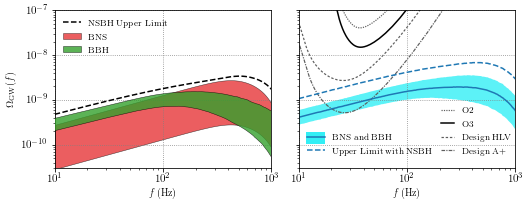

In [7]:
mpl.rcParams.update({'font.size':11,
                        'text.usetex':True})

# Load data file containing ensemble of possible BNS backgrounds
bnsData = np.load('BNS_backgrounds_uniform_1.0_2.5.npy',allow_pickle=True,encoding='latin1')[()]
bnsBackgrounds = bnsData['OmgGW']
freqs = bnsData['f']
bns_omg_05 = np.quantile(bnsBackgrounds,0.05,axis=0)
bns_omg_50 = np.quantile(bnsBackgrounds,0.50,axis=0)
bns_omg_95 = np.quantile(bnsBackgrounds,0.95,axis=0)

# NSBH data
nsbhData = np.load('NSBH_backgrounds_deltaFunctionMasses_upperRateLimits.npy',allow_pickle=True,encoding='latin1')[()]
nsbhBackgrounds = nsbhData['OmgGW']
nsbh_freqs = nsbhData['f']

# BBH data
bbhData = np.load('BBH_backgrounds.npy',allow_pickle=True,encoding='latin1')[()]
bbhBackgrounds = bbhData['OmgGW']
bbh_freqs = bbhData['f']
bbh_omg_05 = np.quantile(bbhBackgrounds,0.05,axis=0)
bbh_omg_50 = np.quantile(bbhBackgrounds,0.50,axis=0)
bbh_omg_95 = np.quantile(bbhBackgrounds,0.95,axis=0)

# Sanity check: make sure all three frequency arrays agree
if (freqs!=nsbh_freqs).any() or (freqs!=bbh_freqs).any():
    print("Frequency arrays don't match!")
    sys.exit()

# Total number of spectra generated
n_bns = bnsBackgrounds.shape[0]
n_nsbh = nsbhBackgrounds.shape[0]
n_bbh = bbhBackgrounds.shape[0]

# Get quantiles describing BBH+BNS Omega(f)
net_05 = np.zeros(freqs.size)
net_50 = np.zeros(freqs.size)
net_95 = np.zeros(freqs.size)
for i in tqdm(range(freqs.size)):

    # At each frequency, draw many combinations of OmegaBBH+OmegaBNS
    bns = bnsBackgrounds[np.random.choice(range(0,n_bns),size=10000,replace=True),i]
    bbh = bbhBackgrounds[np.random.choice(range(0,n_bbh),size=10000,replace=True),i]

    # Compute an ensemble of possible totals
    total = bns+bbh

    # Record quantiles
    net_05[i] = np.quantile(total,0.05)
    net_50[i] = np.quantile(total,0.50)
    net_95[i] = np.quantile(total,0.95)

fig = plt.figure(figsize=(7.5,3),facecolor='white')

######################################
# Panel 1: Individual CBC contributions
######################################

ax = fig.add_subplot(121)
ax.set_xlim(10,1000)
ax.set_ylim(3e-11,1e-7)
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$f\,(\mathrm{Hz})$',fontsize=10)
ax.set_ylabel(r'$\Omega_\mathrm{GW}(f)$',fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')

# Plot individual contributions
ax.fill_between(freqs,bns_omg_05,bns_omg_95,facecolor='#e31a1c',alpha=0.7,lw=0.5,zorder=1,edgecolor='black',label='BNS')
ax.fill_between(freqs,bbh_omg_05,bbh_omg_95,facecolor='#33a02c',alpha=0.8,lw=0.5,zorder=3,edgecolor='black',label='BBH')
ax.plot(freqs,nsbhBackgrounds,color='black',ls='--',label='NSBH Upper Limit')

ax.legend(loc='upper left',fontsize=9,frameon=False)

##############################
# Panel 2: Totals
##############################

ax = fig.add_subplot(122)
ax.set_xlim(10,1000)
ax.set_ylim(3e-11,1e-7)
ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlabel(r'$f\,(\mathrm{Hz})$',fontsize=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_ticklabels([])

# Plot uncertainty range on totals
ax.fill_between(freqs,net_05,net_95,facecolor='#33eff5',edgecolor=None,lw=0,alpha=0.8)
lc, = ax.plot(freqs,net_50,color='#1f78b4')
lc2, = ax.plot(freqs,net_95+nsbhBackgrounds,color='#1f78b4',ls='--')

# Load PI curve data
freqs_O1O2,PI_O1O2 = np.loadtxt('PICurve_O2.dat',unpack=True)
freqs_O3,PI_O3 = np.loadtxt('PICurve_O3.dat',unpack=True)
freqs_design,PI_design = np.loadtxt('PICurve_HLV_Design.dat',unpack=True)
freqs_aplus,PI_aplus = np.loadtxt('PICurve_Aplus_Design.dat',unpack=True)

# Plot 2sigma PI curves
ax.plot(freqs_O1O2,2.*PI_O1O2,dashes=(1,1),label='O2',zorder=1,lw=1.2,color='#5e5e5e')
ax.plot(freqs_O3,2.*PI_O3,color='black',label='O3',zorder=1)
ax.plot(freqs_design,2.*PI_design,color='#5e5e5e',dashes=(2,1.5),label='Design HLV',lw=1.2,zorder=1)
ax.plot(freqs_aplus,2.*PI_aplus,color='#5e5e5e',dashes=(3,1,1,1),label='Design A+',lw=1.2,zorder=1)

alt_legend = plt.legend([lc,lc2],['BNS and BBH','Upper Limit with NSBH'],fontsize=9,frameon=False,loc=(0.02,0.06))
ax.add_artist(alt_legend)
ax.legend(loc=(0.64,0.06),fontsize=9,frameon=False,handlelength=1.5)
rect = Rectangle((0.033,0.155),0.089,0.075,facecolor="#33eff5",zorder=1,transform=ax.transAxes)
ax.add_patch(rect)

plt.tight_layout()
plt.show()

# Figure 6

100%|██████████| 2496/2496 [00:05<00:00, 453.06it/s]


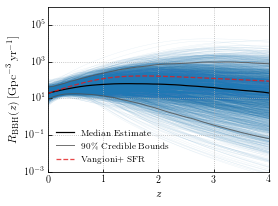

In [8]:
mpl.rcParams.update({'font.size':11,
                        'text.usetex':True})

# Load posterior samples
localRates,_,lmbda_1,lmbda_2,_,_,_,_,_,zpeak,_=np.loadtxt('bbh-rate-evolution.dat',unpack=True)


# Vangioni rate density
# doi:10.1093/mnras/stu2600
# End of Section 2.1
z0 = 1.72
a = 2.80
b = 2.46
zs = np.arange(0.,5.1,0.1)
vangioni = a*np.exp(b*(zs-z0))/(a-b+b*np.exp(a*(zs-z0)))

# Get credible intervals
rateArray = np.zeros((localRates.size,zs.size))
for i in range(localRates.size):
    rateArray[i,:] = localRates[i]*np.power(1.+zs,lmbda_1[i])*(1.+np.power(1./(1.+zpeak[i]),lmbda_1[i]+lmbda_2[i]))/(1.+np.power((1.+zs)/(1.+zpeak[i]),lmbda_1[i]+lmbda_2[i]))
z_2sigma_low = np.quantile(rateArray,0.05,axis=0)
z_1sigma_low = np.quantile(rateArray,0.25,axis=0)
z_median = np.quantile(rateArray,0.5,axis=0)
z_1sigma_high = np.quantile(rateArray,0.75,axis=0)
z_2sigma_high = np.quantile(rateArray,0.95,axis=0)

# Merger rate plot
fig,ax = plt.subplots(figsize=(4,3),facecolor='white')
ax.set_rasterization_zorder(0)
for i in tqdm(range(lmbda_1.size)):   
    ax.plot(zs,localRates[i]*np.power(1.+zs,lmbda_1[i])*(1.+np.power(1./(1.+zpeak[i]),lmbda_1[i]+lmbda_2[i]))/(1.+np.power((1.+zs)/(1.+zpeak[i]),lmbda_1[i]+lmbda_2[i])),alpha=0.1,color='#1f78b4',lw=0.4,zorder=-1)
ax.plot(zs,z_median,color='black',lw=1.2,label='Median Estimate')
ax.plot(zs,z_2sigma_low,color='#525252',lw=1.,alpha=0.8,label='90\% Credible Bounds')
ax.plot(zs,z_2sigma_high,color='#525252',lw=1.,alpha=0.8)

ax.plot(zs,np.median(rateArray[:,0])*vangioni/vangioni[0],color='#e31a1c',ls='--',lw=1.3,alpha=0.8,label='Vangioni+ SFR')

ax.set_yscale('log')
ax.set_xlim([0,4])
ax.set_ylim([1e-3,1e6])
ax.xaxis.grid(True,which='major',ls=':')
ax.yaxis.grid(True,which='major',ls=':')
ax.set_ylabel(r'$R_\mathrm{BBH}(z)\,[\mathrm{Gpc}^{-3}\,\mathrm{yr}^{-1}]$',fontsize=12)
ax.set_xlabel(r'$z$',fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=10, direction='in')
ax.legend(loc='lower left',fontsize=9,frameon=False)
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

# Figure 7

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


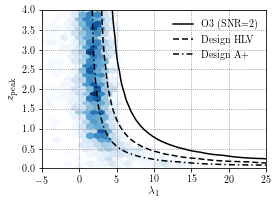

In [9]:
mpl.rcParams.update({'font.size':11,
                        'text.usetex':True})

# Load posterior samples
R0,_,lmbda_1,lmbda_2,_,_,_,_,_,zpeak,_=np.loadtxt('bbh-rate-evolution.dat',unpack=True)


# Fix plotting bounds
xmin=-5
xmax=25.
ymin=0.
ymax=4.
nbins = 30

# Plot posterior samples in lambda_1, zpeak
fig,ax = plt.subplots(figsize=(4.,3.),facecolor='white')
ax.hexbin(lmbda_1,zpeak,cmap='Blues',gridsize=nbins,extent=(xmin,xmax,ymin,ymax),mincnt=1)

v,v_design,v_aplus = np.load('contourData.npy',allow_pickle=True,encoding='latin1')
ax.plot(v[:,0],v[:,1],color='black')
ax.plot(v_design[:,0],v_design[:,1],color='black',dashes=(4.0, 2.0))
ax.plot(v_aplus[:,0],v_aplus[:,1],color='black',dashes=(4,2,1,2))

ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel(r'$\lambda_1$',fontsize=12)
ax.set_ylabel(r'$z_\mathrm{peak}$',fontsize=12)
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
locs=np.arange(0,4.1,0.5)
ax.set_yticks(locs)

l1 = plt.Line2D((0, 1), (0, 0), color='black')
l2 = plt.Line2D((0, 1), (0, 0), color='black',dashes=(4,2))
l3 = plt.Line2D((0, 1), (0, 0), color='black',dashes=(4,2,1,2))
ax.legend([l1,l2,l3],["O3 (SNR=2)","Design HLV","Design A+"],loc='upper right',frameon=False,fontsize=10)

plt.tight_layout()
plt.show()

# Table 1 results

In [10]:
def load_Ysig(filename):
    """
    Read in CC spectra file
    """
    freqs,Y_f,sigma_f = np.loadtxt(filename,unpack=True)
    return Y_f,sigma_f,freqs

def band_with_X_percent_of_sensitivity(Y,sig,freqs,X=99,alpha=0,fref=25):
    """
    Compute f_99
    """
    x=X/100.
    Hf=(freqs/fref)**alpha
    cum_var_m2 = np.cumsum(sig**(-2) * Hf**2)
    cum_sens = np.sqrt(cum_var_m2)
    sens_f = cum_sens / cum_sens[-1]
    ii_x = np.argmin(np.abs(sens_f-x))
    return freqs[ii_x]

def calc_broadband_estimators(Y,sig,freqs,alpha=0,fref=25):
    """
    Compute point estimate and error bar from CC spectra by combining frequency bins
    """
    w = (freqs/fref)**alpha
    Ya = Y / w
    siga = sig / w
    cut = np.logical_not(Y==0)
    sigbb = 1/np.sqrt(np.sum(siga[cut]**(-2)))
    Ybb = np.sum(Ya[cut]/siga[cut]**(2)) * sigbb**2
    return Ybb, sigbb

In [11]:
filenames=dict(
      HL_O3='C_O3_HL.dat',
      HV_O3='C_O3_HV.dat',
      LV_O3='C_O3_LV.dat',
      HLV='C_O1_O2_O3.dat')
baselines=['HL_O3','HV_O3','LV_O3','HLV']

for baseline in baselines:
    print(baseline)
    Y,sig,freqs=load_Ysig(filenames[baseline])
    Ybb0,sigbb0=calc_broadband_estimators(Y,sig,freqs,alpha=0,fref=25)
    Ybb2_3,sigbb2_3=calc_broadband_estimators(Y,sig,freqs,alpha=2./3,fref=25)
    Ybb3,sigbb3=calc_broadband_estimators(Y,sig,freqs,alpha=3,fref=25)
    DeltaF_99=band_with_X_percent_of_sensitivity(Y,sig,freqs,X=99)
    DeltaF_99_23=band_with_X_percent_of_sensitivity(Y,sig,freqs,X=99,alpha=2./3)
    DeltaF_99_3=band_with_X_percent_of_sensitivity(Y,sig,freqs,X=99,alpha=3)

    print('\tDelta F 99 [a=0]= %2.1f'%(DeltaF_99))
    print('\talpha=0: Y=%2.2e +/- %2.2e'%(Ybb0,sigbb0))
    print('\tDelta F 99 [a=2/3]= %2.1f'%(DeltaF_99_23))
    print('\talpha=2/3: Y=%2.2e +/- %2.2e'%(Ybb2_3,sigbb2_3))
    print('\talpha=3: Y=%2.2e +/- %2.2e'%(Ybb3,sigbb3))
    print('\tDelta F 99 [a=3]= %2.1f'%(DeltaF_99_3))

HL_O3
	Delta F 99 [a=0]= 76.1
	alpha=0: Y=-2.08e-09 +/- 8.19e-09
	Delta F 99 [a=2/3]= 90.2
	alpha=2/3: Y=-3.41e-09 +/- 6.12e-09
	alpha=3: Y=-1.31e-09 +/- 9.36e-10
	Delta F 99 [a=3]= 282.8
HV_O3
	Delta F 99 [a=0]= 97.7
	alpha=0: Y=2.29e-07 +/- 9.75e-08
	Delta F 99 [a=2/3]= 117.8
	alpha=2/3: Y=1.45e-07 +/- 5.97e-08
	alpha=3: Y=9.13e-09 +/- 4.14e-09
	Delta F 99 [a=3]= 375.8
LV_O3
	Delta F 99 [a=0]= 88.0
	alpha=0: Y=-1.34e-07 +/- 6.26e-08
	Delta F 99 [a=2/3]= 107.3
	alpha=2/3: Y=-8.15e-08 +/- 3.97e-08
	alpha=3: Y=-4.85e-09 +/- 3.14e-09
	Delta F 99 [a=3]= 388.0
HLV
	Delta F 99 [a=0]= 76.6
	alpha=0: Y=1.14e-09 +/- 7.51e-09
	Delta F 99 [a=2/3]= 90.6
	alpha=2/3: Y=-2.48e-10 +/- 5.60e-09
	alpha=3: Y=-6.23e-10 +/- 8.29e-10
	Delta F 99 [a=3]= 291.6


# Table 2 results

In [12]:
print('*************')
print('Log Uniform Prior')
print('*************')

data='PL_alpha0_log.dat'
logOmgT,aT = np.loadtxt(data,unpack=True) 
logOm_UL=np.percentile(logOmgT,95)
Om_UL=10**logOm_UL
print('95%% Upper limit (a=0)=%e'%Om_UL)

data='PL_alpha2_3_log.dat'
logOmgT,aT = np.loadtxt(data,unpack=True) 
logOm_UL=np.percentile(logOmgT,95)
Om_UL=10**logOm_UL
print('95%% Upper limit (a=2/3)=%e'%Om_UL)

data='PL_alpha3_log.dat'
logOmgT,aT = np.loadtxt(data,unpack=True) 
logOm_UL=np.percentile(logOmgT,95)
Om_UL=10**logOm_UL
print('95%% Upper limit (a=3)=%e'%Om_UL)

data='PL_GaussianAlpha_log.dat'
logOmgT,aT = np.loadtxt(data,unpack=True) 
logOm_UL=np.percentile(logOmgT,95)
Om_UL=10**logOm_UL
print('95%% Upper limit (Marg.)=%e'%Om_UL)


print('*************')
print('Uniform Prior')
print('*************')

data='PL_alpha0_uniform.dat'
OmgT,aT = np.loadtxt(data,unpack=True) 
Om_UL=np.percentile(OmgT,95)
print('95%% Upper limit (a=0)=%e'%Om_UL)

data='PL_alpha2_3_uniform.dat'
OmgT,aT = np.loadtxt(data,unpack=True) 
Om_UL=np.percentile(OmgT,95)
print('95%% Upper limit (a=2/3)=%e'%Om_UL)

data='PL_alpha3_uniform.dat'
OmgT,aT = np.loadtxt(data,unpack=True) 
Om_UL=np.percentile(OmgT,95)
print('95%% Upper limit (a=3)=%e'%Om_UL)

data='PL_GaussianAlpha_uniform.dat'
OmgT,aT = np.loadtxt(data,unpack=True) 
Om_UL=np.percentile(OmgT,95)
print('95%% Upper limit (Marg.)=%e'%Om_UL)

*************
Log Uniform Prior
*************
95% Upper limit (a=0)=5.794322e-09
95% Upper limit (a=2/3)=3.392431e-09
95% Upper limit (a=3)=3.897272e-10
95% Upper limit (Marg.)=6.595101e-09
*************
Uniform Prior
*************
95% Upper limit (a=0)=1.659985e-08
95% Upper limit (a=2/3)=1.196909e-08
95% Upper limit (a=3)=1.336374e-09
95% Upper limit (Marg.)=2.655114e-08


# Table 3 results

In [13]:
data='SVT-PL.dat'
OmgT,OmgV,OmgS,aT,aV,aS=np.loadtxt(data,unpack=True)

logOmT_UL=np.percentile(OmgT,95)
logOmV_UL=np.percentile(OmgV,95)
logOmS_UL=np.percentile(OmgS,95)

OmT_UL=10**logOmT_UL
OmV_UL=10**logOmV_UL
OmS_UL=10**logOmS_UL

print('*************')
print('SVT Upper limits (log uniform prior)')
print('*************')
print('95%% Upper limit (T)=%e'%OmT_UL)
print('95%% Upper limit (V)=%e'%OmV_UL)
print('95%% Upper limit (S)=%e'%OmS_UL)

*************
SVT Upper limits (log uniform prior)
*************
95% Upper limit (T)=6.404902e-09
95% Upper limit (V)=7.899311e-09
95% Upper limit (S)=2.110771e-08
